In [ ]:
import matplotlib.pyplot as plt

# 1. Data Preparation
## 1.1 Load Dataset
We load the breast cancer dataset (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

Check the size - there are 569 total examples, with 30 features each.

Print the feature names and the names of the 2 target classes.
Each example represents a mass, with features to describe attributes of the digitized image. Each mass is classified as malignant or benign.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print(cancer_dataset.data.shape)

(569, 30)


In [ ]:
print('Feature Names: {}\n'.format(cancer_dataset.feature_names))
print('Classes: {}'.format(cancer_dataset.target_names))

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Classes: ['malignant' 'benign']


In [ ]:
print(list(zip(cancer_dataset.feature_names, cancer_dataset.data[0])))
print(cancer_dataset.target_names[cancer_dataset.target[0]])

[('mean radius', 17.99), ('mean texture', 10.38), ('mean perimeter', 122.8), ('mean area', 1001.0), ('mean smoothness', 0.1184), ('mean compactness', 0.2776), ('mean concavity', 0.3001), ('mean concave points', 0.1471), ('mean symmetry', 0.2419), ('mean fractal dimension', 0.07871), ('radius error', 1.095), ('texture error', 0.9053), ('perimeter error', 8.589), ('area error', 153.4), ('smoothness error', 0.006399), ('compactness error', 0.04904), ('concavity error', 0.05373), ('concave points error', 0.01587), ('symmetry error', 0.03003), ('fractal dimension error', 0.006193), ('worst radius', 25.38), ('worst texture', 17.33), ('worst perimeter', 184.6), ('worst area', 2019.0), ('worst smoothness', 0.1622), ('worst compactness', 0.6656), ('worst concavity', 0.7119), ('worst concave points', 0.2654), ('worst symmetry', 0.4601), ('worst fractal dimension', 0.1189)]
malignant


## 1.2 Train-Test Data Split
Create train and test datasets.
Train dataset is 80% of data. Test dataset is 20% of data.

Check lengths of train and test datasets compared to length of original dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer_dataset.data, cancer_dataset.target, test_size = 0.20, random_state = 0)
print('Length of full dataset: {}'.format(len(cancer_dataset.data)))
print('Length of train dataset: {}'.format(len(X_train)))
print('Length of test dataset: {}'.format(len(X_test)))

Length of full dataset: 569
Length of train dataset: 455
Length of test dataset: 114


## 1.3 Scale & Normalize Features
Scale features using the `sklearn.preprocessing.StandardScaler`.

Look at comparison of feature values for one example.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print('Before scaling: {}'.format(X_train[0]))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('After scaling: {}'.format(X_train[0]))

Before scaling: [1.005e+01 1.753e+01 6.441e+01 3.108e+02 1.007e-01 7.326e-02 2.511e-02
 1.775e-02 1.890e-01 6.331e-02 2.619e-01 2.015e+00 1.778e+00 1.685e+01
 7.803e-03 1.449e-02 1.690e-02 8.043e-03 2.100e-02 2.778e-03 1.116e+01
 2.684e+01 7.198e+01 3.840e+02 1.402e-01 1.402e-01 1.055e-01 6.499e-02
 2.894e-01 7.664e-02]
After scaling: [-1.15036482 -0.39064196 -1.12855021 -0.95876358  0.3109837  -0.5959945
 -0.80259612 -0.80249002  0.29453906  0.0942515  -0.4950523   1.48720153
 -0.51448782 -0.49154005  0.28149837 -0.60451206 -0.46900701 -0.61170002
  0.05798237 -0.35763702 -1.0431756   0.21353282 -1.0360446  -0.84880771
  0.34249851 -0.73009743 -0.81232053 -0.75798367 -0.01614761 -0.38503402]


Now we are ready to do some modeling.

# 2. Model Selection
## 2.1 [Naive Bayes Classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Use the trained model to predict on `X_test`

In [ ]:
Y_pred = classifier.predict(X_test)

Check performance by comparing predictions `Y_pred` with true labels `Y_test`.

Compute accuracy. Then generate confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test dataset: {}'.format(acc))

Accuracy on test dataset: 0.9035087719298246


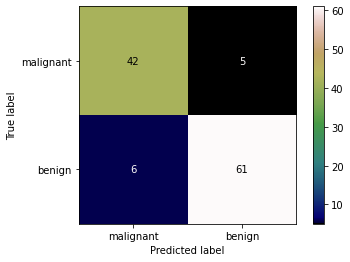

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(
    classifier, X_test, Y_test,
    display_labels=cancer_dataset.target_names,
    cmap=plt.cm.gist_earth
)

## 2.2 [KNN Classification](https://scikit-learn.org/stable/modules/neighbors.html)
KNN stands for K-Nearest Neighbor

We cluster training data, then classify test data points based on the train data points they are closest to.

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Use the trained model to predict on `X_test`

In [ ]:
Y_pred = classifier.predict(X_test)

Check performance by comparing predictions `Y_pred` with true labels `Y_test`.

Compute accuracy. Then generate confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test dataset: {}'.format(acc))

Accuracy on test dataset: 0.956140350877193


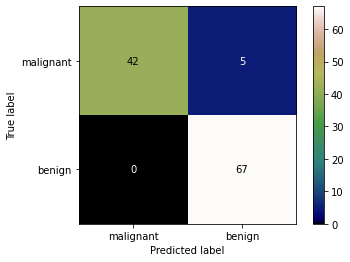

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(
    classifier, X_test, Y_test,
    display_labels=cancer_dataset.target_names,
    cmap=plt.cm.gist_earth
)

Train the logistic regression model on `X_train` and `Y_train`

## 2.3 [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
![](https://miro.medium.com/max/700/0*VJPD6GZf6YHR8Dra.jpg)

Linear regression equation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/836d93163447344be4715ec00638c1cd829e376c)

Now constrain this value to be between 0 and 1 with a sigmoid:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e376fe69caee24c914fab1360de36900b7bb9c24)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Use the trained model to predict on `X_test`

In [ ]:
Y_pred = classifier.predict(X_test)

Check performance by comparing predictions `Y_pred` with true labels `Y_test`.

Compute accuracy. Then generate confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test dataset: {}'.format(acc))

Accuracy on test dataset: 0.9649122807017544


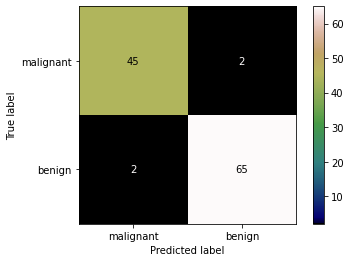

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(
    classifier, X_test, Y_test,
    display_labels=cancer_dataset.target_names,
    cmap=plt.cm.gist_earth
)